In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df =pd.read_csv("../artifacts/data.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
x=df.drop("math_score",axis=1)

In [4]:
y=df['math_score']

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=25,random_state=8)

In [45]:
xtrain.shape

(975, 7)

In [46]:
xtest.shape

(25, 7)

In [47]:
ss=StandardScaler()
ohe=OneHotEncoder()

num_cols = x.select_dtypes(include='number').columns
cat_cols = x.select_dtypes(exclude='number').columns

preprocessor = ColumnTransformer([("One_Hot_Encoder",ohe,cat_cols),
                                  ("Standard_Scaler",ss,num_cols)
                                 ])

In [48]:
preprocessor

ColumnTransformer(transformers=[('One_Hot_Encoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('Standard_Scaler', StandardScaler(),
                                 Index(['reading_score', 'writing_score'], dtype='object'))])

In [49]:
xtrain_preprocessed=preprocessor.fit_transform(xtrain)

In [50]:
pd.DataFrame(xtrain_preprocessed)[[17,18]].describe()

,17,18
count,9.750000e+02,9.750000e+02
mean,2.915047e-17,1.475743e-16
std,1.000513e+00,1.000513e+00
min,-3.593998e+00,-3.834901e+00
25%,-7.065873e-01,-7.029997e-01
50%,4.963950e-02,5.524994e-02
75%,7.371184e-01,7.145975e-01
max,2.112076e+00,2.099227e+00


In [51]:
xtest_preprocessed = preprocessor.transform(xtest)

In [52]:
xtest.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
908,female,group C,bachelor's degree,free/reduced,none,75,72
265,male,group D,some high school,free/reduced,none,42,41
627,male,group D,associate's degree,standard,none,48,46
327,male,group A,some college,free/reduced,none,23,19
244,male,group D,some high school,standard,none,74,69


<Axes: ylabel='Density'>

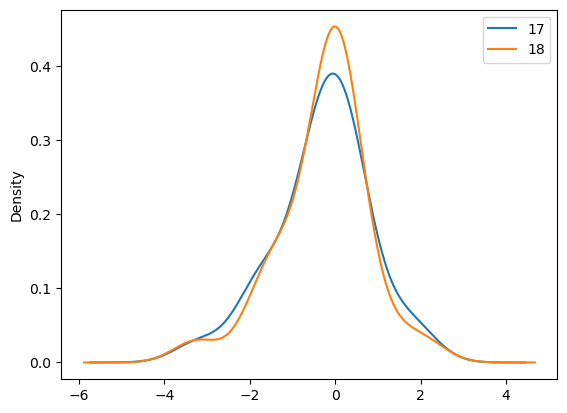

In [53]:
pd.DataFrame(xtest_preprocessed)[[17,18]].plot(kind='kde')

In [54]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Support Vector Regression" : SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor()
}

In [61]:
rmse=[]
mae=[]
r2_train=[]
r2_test=[]
cross_val=[]

for model_name,model in models.items():
    
    model.fit(xtrain_preprocessed,ytrain)
    
    ypred_train=model.predict(xtrain_preprocessed)
    ypred_test=model.predict(xtest_preprocessed)
    
    rmse.append(np.sqrt(mean_squared_error(y_true=ytest,y_pred=ypred_test)))
    mae.append(mean_absolute_error(y_true=ytest,y_pred=ypred_test))
    
    r2_train.append(r2_score(y_true=ytrain,y_pred=ypred_train))
    r2_test.append(r2_score(y_true=ytest,y_pred=ypred_test))
    
    cross_val.append(np.mean(cross_val_score(model,xtrain_preprocessed,ytrain,cv=10,scoring='r2')))    
    

Learning rate set to 0.04078
0:	learn: 14.7004604	total: 1.66ms	remaining: 1.66s
1:	learn: 14.3033725	total: 2.43ms	remaining: 1.21s
2:	learn: 13.9125620	total: 3.16ms	remaining: 1.05s
3:	learn: 13.5322502	total: 3.9ms	remaining: 972ms
4:	learn: 13.1801920	total: 4.6ms	remaining: 916ms
5:	learn: 12.8491901	total: 5.31ms	remaining: 880ms
6:	learn: 12.5384006	total: 6.04ms	remaining: 857ms
7:	learn: 12.2518602	total: 6.74ms	remaining: 836ms
8:	learn: 11.9524212	total: 7.47ms	remaining: 822ms
9:	learn: 11.6552024	total: 8.2ms	remaining: 812ms
10:	learn: 11.3629571	total: 8.93ms	remaining: 802ms
11:	learn: 11.1012692	total: 9.66ms	remaining: 796ms
12:	learn: 10.8548617	total: 10.4ms	remaining: 792ms
13:	learn: 10.5950365	total: 11.1ms	remaining: 782ms
14:	learn: 10.3583091	total: 11.9ms	remaining: 778ms
15:	learn: 10.1215397	total: 12.6ms	remaining: 775ms
16:	learn: 9.9026744	total: 13.3ms	remaining: 768ms
17:	learn: 9.6984976	total: 14ms	remaining: 762ms
18:	learn: 9.4844120	total: 14.7ms

260:	learn: 4.6645644	total: 192ms	remaining: 544ms
261:	learn: 4.6598340	total: 193ms	remaining: 544ms
262:	learn: 4.6547641	total: 194ms	remaining: 543ms
263:	learn: 4.6526689	total: 195ms	remaining: 543ms
264:	learn: 4.6500133	total: 196ms	remaining: 543ms
265:	learn: 4.6448102	total: 196ms	remaining: 542ms
266:	learn: 4.6431998	total: 197ms	remaining: 542ms
267:	learn: 4.6391706	total: 198ms	remaining: 541ms
268:	learn: 4.6360176	total: 199ms	remaining: 540ms
269:	learn: 4.6341021	total: 200ms	remaining: 540ms
270:	learn: 4.6331198	total: 200ms	remaining: 539ms
271:	learn: 4.6319700	total: 201ms	remaining: 539ms
272:	learn: 4.6300325	total: 202ms	remaining: 538ms
273:	learn: 4.6274458	total: 203ms	remaining: 538ms
274:	learn: 4.6232679	total: 204ms	remaining: 537ms
275:	learn: 4.6182921	total: 205ms	remaining: 537ms
276:	learn: 4.6123183	total: 206ms	remaining: 536ms
277:	learn: 4.6074557	total: 206ms	remaining: 536ms
278:	learn: 4.6037006	total: 207ms	remaining: 536ms
279:	learn: 

486:	learn: 4.0413368	total: 379ms	remaining: 399ms
487:	learn: 4.0387370	total: 380ms	remaining: 399ms
488:	learn: 4.0381084	total: 381ms	remaining: 398ms
489:	learn: 4.0357291	total: 382ms	remaining: 398ms
490:	learn: 4.0313675	total: 383ms	remaining: 397ms
491:	learn: 4.0278908	total: 384ms	remaining: 396ms
492:	learn: 4.0264505	total: 385ms	remaining: 396ms
493:	learn: 4.0260429	total: 385ms	remaining: 395ms
494:	learn: 4.0235178	total: 386ms	remaining: 394ms
495:	learn: 4.0189160	total: 387ms	remaining: 393ms
496:	learn: 4.0172045	total: 388ms	remaining: 393ms
497:	learn: 4.0170442	total: 389ms	remaining: 392ms
498:	learn: 4.0155768	total: 389ms	remaining: 391ms
499:	learn: 4.0137732	total: 390ms	remaining: 390ms
500:	learn: 4.0091179	total: 391ms	remaining: 390ms
501:	learn: 4.0086875	total: 392ms	remaining: 389ms
502:	learn: 4.0080210	total: 393ms	remaining: 388ms
503:	learn: 4.0074948	total: 394ms	remaining: 388ms
504:	learn: 4.0058351	total: 395ms	remaining: 387ms
505:	learn: 

715:	learn: 3.6039944	total: 564ms	remaining: 224ms
716:	learn: 3.6030277	total: 565ms	remaining: 223ms
717:	learn: 3.6006731	total: 566ms	remaining: 222ms
718:	learn: 3.5985547	total: 567ms	remaining: 222ms
719:	learn: 3.5961683	total: 568ms	remaining: 221ms
720:	learn: 3.5957497	total: 569ms	remaining: 220ms
721:	learn: 3.5932204	total: 570ms	remaining: 219ms
722:	learn: 3.5900825	total: 570ms	remaining: 218ms
723:	learn: 3.5882997	total: 571ms	remaining: 218ms
724:	learn: 3.5879854	total: 572ms	remaining: 217ms
725:	learn: 3.5868932	total: 573ms	remaining: 216ms
726:	learn: 3.5852280	total: 573ms	remaining: 215ms
727:	learn: 3.5841802	total: 574ms	remaining: 215ms
728:	learn: 3.5831044	total: 575ms	remaining: 214ms
729:	learn: 3.5811385	total: 576ms	remaining: 213ms
730:	learn: 3.5808682	total: 577ms	remaining: 212ms
731:	learn: 3.5789771	total: 577ms	remaining: 211ms
732:	learn: 3.5768930	total: 578ms	remaining: 211ms
733:	learn: 3.5755418	total: 579ms	remaining: 210ms
734:	learn: 

974:	learn: 3.2089058	total: 750ms	remaining: 19.2ms
975:	learn: 3.2087928	total: 751ms	remaining: 18.5ms
976:	learn: 3.2086785	total: 752ms	remaining: 17.7ms
977:	learn: 3.2084561	total: 753ms	remaining: 16.9ms
978:	learn: 3.2083258	total: 754ms	remaining: 16.2ms
979:	learn: 3.2076071	total: 755ms	remaining: 15.4ms
980:	learn: 3.2057470	total: 756ms	remaining: 14.6ms
981:	learn: 3.2045369	total: 757ms	remaining: 13.9ms
982:	learn: 3.2033404	total: 758ms	remaining: 13.1ms
983:	learn: 3.2024525	total: 758ms	remaining: 12.3ms
984:	learn: 3.2010818	total: 759ms	remaining: 11.6ms
985:	learn: 3.1994484	total: 760ms	remaining: 10.8ms
986:	learn: 3.1979365	total: 761ms	remaining: 10ms
987:	learn: 3.1976387	total: 762ms	remaining: 9.25ms
988:	learn: 3.1958892	total: 763ms	remaining: 8.48ms
989:	learn: 3.1938150	total: 764ms	remaining: 7.71ms
990:	learn: 3.1924475	total: 764ms	remaining: 6.94ms
991:	learn: 3.1913922	total: 765ms	remaining: 6.17ms
992:	learn: 3.1895362	total: 766ms	remaining: 5.

180:	learn: 4.7852724	total: 281ms	remaining: 1.27s
181:	learn: 4.7805365	total: 283ms	remaining: 1.27s
182:	learn: 4.7781282	total: 285ms	remaining: 1.27s
183:	learn: 4.7734712	total: 287ms	remaining: 1.27s
184:	learn: 4.7702229	total: 288ms	remaining: 1.27s
185:	learn: 4.7657171	total: 290ms	remaining: 1.27s
186:	learn: 4.7612218	total: 291ms	remaining: 1.27s
187:	learn: 4.7566210	total: 293ms	remaining: 1.26s
188:	learn: 4.7539610	total: 294ms	remaining: 1.26s
189:	learn: 4.7515805	total: 296ms	remaining: 1.26s
190:	learn: 4.7464328	total: 297ms	remaining: 1.26s
191:	learn: 4.7447372	total: 299ms	remaining: 1.26s
192:	learn: 4.7395820	total: 301ms	remaining: 1.26s
193:	learn: 4.7363445	total: 302ms	remaining: 1.25s
194:	learn: 4.7324356	total: 304ms	remaining: 1.25s
195:	learn: 4.7300862	total: 305ms	remaining: 1.25s
196:	learn: 4.7264892	total: 307ms	remaining: 1.25s
197:	learn: 4.7242182	total: 309ms	remaining: 1.25s
198:	learn: 4.7199011	total: 310ms	remaining: 1.25s
199:	learn: 

459:	learn: 3.9095944	total: 660ms	remaining: 775ms
460:	learn: 3.9093279	total: 662ms	remaining: 774ms
461:	learn: 3.9078258	total: 664ms	remaining: 773ms
462:	learn: 3.9042470	total: 666ms	remaining: 772ms
463:	learn: 3.9013128	total: 668ms	remaining: 771ms
464:	learn: 3.9009134	total: 669ms	remaining: 770ms
465:	learn: 3.8977425	total: 671ms	remaining: 769ms
466:	learn: 3.8974170	total: 672ms	remaining: 767ms
467:	learn: 3.8931636	total: 674ms	remaining: 766ms
468:	learn: 3.8910701	total: 676ms	remaining: 765ms
469:	learn: 3.8901530	total: 677ms	remaining: 764ms
470:	learn: 3.8896762	total: 679ms	remaining: 763ms
471:	learn: 3.8857151	total: 681ms	remaining: 762ms
472:	learn: 3.8818864	total: 682ms	remaining: 760ms
473:	learn: 3.8818165	total: 684ms	remaining: 759ms
474:	learn: 3.8816782	total: 686ms	remaining: 758ms
475:	learn: 3.8803359	total: 687ms	remaining: 757ms
476:	learn: 3.8801725	total: 689ms	remaining: 756ms
477:	learn: 3.8777537	total: 691ms	remaining: 755ms
478:	learn: 

693:	learn: 3.4438641	total: 1.03s	remaining: 455ms
694:	learn: 3.4417681	total: 1.03s	remaining: 454ms
695:	learn: 3.4406553	total: 1.04s	remaining: 453ms
696:	learn: 3.4403805	total: 1.04s	remaining: 451ms
697:	learn: 3.4377313	total: 1.04s	remaining: 450ms
698:	learn: 3.4350263	total: 1.04s	remaining: 448ms
699:	learn: 3.4326522	total: 1.04s	remaining: 447ms
700:	learn: 3.4316552	total: 1.04s	remaining: 445ms
701:	learn: 3.4291634	total: 1.04s	remaining: 444ms
702:	learn: 3.4286134	total: 1.05s	remaining: 442ms
703:	learn: 3.4285941	total: 1.05s	remaining: 441ms
704:	learn: 3.4270631	total: 1.05s	remaining: 439ms
705:	learn: 3.4262835	total: 1.05s	remaining: 438ms
706:	learn: 3.4234887	total: 1.05s	remaining: 436ms
707:	learn: 3.4215525	total: 1.05s	remaining: 435ms
708:	learn: 3.4190317	total: 1.06s	remaining: 434ms
709:	learn: 3.4168300	total: 1.06s	remaining: 432ms
710:	learn: 3.4115274	total: 1.06s	remaining: 431ms
711:	learn: 3.4094441	total: 1.06s	remaining: 429ms
712:	learn: 

857:	learn: 3.1681344	total: 1.23s	remaining: 203ms
858:	learn: 3.1680301	total: 1.23s	remaining: 202ms
859:	learn: 3.1662195	total: 1.23s	remaining: 201ms
860:	learn: 3.1647502	total: 1.23s	remaining: 199ms
861:	learn: 3.1631204	total: 1.24s	remaining: 198ms
862:	learn: 3.1610358	total: 1.24s	remaining: 196ms
863:	learn: 3.1608164	total: 1.24s	remaining: 195ms
864:	learn: 3.1598255	total: 1.24s	remaining: 194ms
865:	learn: 3.1584446	total: 1.24s	remaining: 192ms
866:	learn: 3.1561940	total: 1.24s	remaining: 191ms
867:	learn: 3.1547426	total: 1.25s	remaining: 189ms
868:	learn: 3.1540752	total: 1.25s	remaining: 188ms
869:	learn: 3.1520994	total: 1.25s	remaining: 187ms
870:	learn: 3.1513491	total: 1.25s	remaining: 185ms
871:	learn: 3.1493697	total: 1.25s	remaining: 184ms
872:	learn: 3.1484251	total: 1.25s	remaining: 182ms
873:	learn: 3.1462335	total: 1.25s	remaining: 181ms
874:	learn: 3.1447604	total: 1.25s	remaining: 179ms
875:	learn: 3.1425524	total: 1.26s	remaining: 178ms
876:	learn: 

137:	learn: 5.0603391	total: 183ms	remaining: 1.14s
138:	learn: 5.0541233	total: 184ms	remaining: 1.14s
139:	learn: 5.0501065	total: 184ms	remaining: 1.13s
140:	learn: 5.0482057	total: 185ms	remaining: 1.13s
141:	learn: 5.0442696	total: 186ms	remaining: 1.13s
142:	learn: 5.0435496	total: 187ms	remaining: 1.12s
143:	learn: 5.0384395	total: 188ms	remaining: 1.11s
144:	learn: 5.0349210	total: 188ms	remaining: 1.11s
145:	learn: 5.0322517	total: 189ms	remaining: 1.1s
146:	learn: 5.0284391	total: 190ms	remaining: 1.1s
147:	learn: 5.0253465	total: 191ms	remaining: 1.1s
148:	learn: 5.0206735	total: 191ms	remaining: 1.09s
149:	learn: 5.0144298	total: 192ms	remaining: 1.09s
150:	learn: 5.0108023	total: 193ms	remaining: 1.08s
151:	learn: 5.0069408	total: 194ms	remaining: 1.08s
152:	learn: 5.0041100	total: 195ms	remaining: 1.08s
153:	learn: 5.0002959	total: 195ms	remaining: 1.07s
154:	learn: 4.9964235	total: 196ms	remaining: 1.07s
155:	learn: 4.9903265	total: 197ms	remaining: 1.06s
156:	learn: 4.9

362:	learn: 4.2737904	total: 372ms	remaining: 652ms
363:	learn: 4.2687055	total: 373ms	remaining: 651ms
364:	learn: 4.2644270	total: 374ms	remaining: 650ms
365:	learn: 4.2612793	total: 374ms	remaining: 648ms
366:	learn: 4.2604413	total: 375ms	remaining: 647ms
367:	learn: 4.2576566	total: 376ms	remaining: 645ms
368:	learn: 4.2536425	total: 377ms	remaining: 644ms
369:	learn: 4.2510799	total: 377ms	remaining: 643ms
370:	learn: 4.2479087	total: 378ms	remaining: 641ms
371:	learn: 4.2470041	total: 379ms	remaining: 640ms
372:	learn: 4.2444646	total: 380ms	remaining: 639ms
373:	learn: 4.2433435	total: 381ms	remaining: 637ms
374:	learn: 4.2389411	total: 382ms	remaining: 636ms
375:	learn: 4.2352312	total: 382ms	remaining: 635ms
376:	learn: 4.2312974	total: 383ms	remaining: 633ms
377:	learn: 4.2283457	total: 384ms	remaining: 632ms
378:	learn: 4.2243014	total: 385ms	remaining: 630ms
379:	learn: 4.2192306	total: 386ms	remaining: 629ms
380:	learn: 4.2184054	total: 386ms	remaining: 628ms
381:	learn: 

581:	learn: 3.7043972	total: 560ms	remaining: 402ms
582:	learn: 3.7035987	total: 561ms	remaining: 402ms
583:	learn: 3.7004122	total: 563ms	remaining: 401ms
584:	learn: 3.6974201	total: 564ms	remaining: 400ms
585:	learn: 3.6935106	total: 565ms	remaining: 399ms
586:	learn: 3.6906291	total: 566ms	remaining: 398ms
587:	learn: 3.6893611	total: 566ms	remaining: 397ms
588:	learn: 3.6868377	total: 567ms	remaining: 396ms
589:	learn: 3.6847863	total: 568ms	remaining: 395ms
590:	learn: 3.6826013	total: 569ms	remaining: 393ms
591:	learn: 3.6821628	total: 569ms	remaining: 392ms
592:	learn: 3.6808341	total: 570ms	remaining: 391ms
593:	learn: 3.6789065	total: 571ms	remaining: 390ms
594:	learn: 3.6745521	total: 572ms	remaining: 389ms
595:	learn: 3.6740870	total: 572ms	remaining: 388ms
596:	learn: 3.6722158	total: 573ms	remaining: 387ms
597:	learn: 3.6712716	total: 574ms	remaining: 386ms
598:	learn: 3.6694805	total: 575ms	remaining: 385ms
599:	learn: 3.6684846	total: 575ms	remaining: 384ms
600:	learn: 

794:	learn: 3.3475700	total: 741ms	remaining: 191ms
795:	learn: 3.3451129	total: 742ms	remaining: 190ms
796:	learn: 3.3447114	total: 743ms	remaining: 189ms
797:	learn: 3.3425814	total: 744ms	remaining: 188ms
798:	learn: 3.3416995	total: 745ms	remaining: 187ms
799:	learn: 3.3401961	total: 746ms	remaining: 187ms
800:	learn: 3.3368513	total: 747ms	remaining: 186ms
801:	learn: 3.3343455	total: 748ms	remaining: 185ms
802:	learn: 3.3332999	total: 749ms	remaining: 184ms
803:	learn: 3.3311870	total: 750ms	remaining: 183ms
804:	learn: 3.3297288	total: 751ms	remaining: 182ms
805:	learn: 3.3272393	total: 752ms	remaining: 181ms
806:	learn: 3.3248215	total: 753ms	remaining: 180ms
807:	learn: 3.3237187	total: 754ms	remaining: 179ms
808:	learn: 3.3210265	total: 755ms	remaining: 178ms
809:	learn: 3.3185815	total: 756ms	remaining: 177ms
810:	learn: 3.3175160	total: 757ms	remaining: 176ms
811:	learn: 3.3143813	total: 758ms	remaining: 176ms
812:	learn: 3.3134342	total: 759ms	remaining: 175ms
813:	learn: 

991:	learn: 3.0681036	total: 925ms	remaining: 7.46ms
992:	learn: 3.0666132	total: 926ms	remaining: 6.53ms
993:	learn: 3.0648927	total: 927ms	remaining: 5.59ms
994:	learn: 3.0626083	total: 928ms	remaining: 4.66ms
995:	learn: 3.0609736	total: 929ms	remaining: 3.73ms
996:	learn: 3.0601196	total: 930ms	remaining: 2.8ms
997:	learn: 3.0588193	total: 931ms	remaining: 1.86ms
998:	learn: 3.0572667	total: 931ms	remaining: 932us
999:	learn: 3.0558637	total: 932ms	remaining: 0us
Learning rate set to 0.040103
0:	learn: 14.6088416	total: 18.3ms	remaining: 18.3s
1:	learn: 14.2297429	total: 20.1ms	remaining: 10s
2:	learn: 13.8517071	total: 21.7ms	remaining: 7.21s
3:	learn: 13.4792348	total: 23.3ms	remaining: 5.79s
4:	learn: 13.1344287	total: 24.9ms	remaining: 4.96s
5:	learn: 12.8227111	total: 26.5ms	remaining: 4.39s
6:	learn: 12.5094713	total: 27.9ms	remaining: 3.96s
7:	learn: 12.2405899	total: 29.4ms	remaining: 3.65s
8:	learn: 11.9772833	total: 31.2ms	remaining: 3.44s
9:	learn: 11.6843588	total: 32.8

187:	learn: 4.8790486	total: 313ms	remaining: 1.35s
188:	learn: 4.8759616	total: 314ms	remaining: 1.35s
189:	learn: 4.8734599	total: 316ms	remaining: 1.35s
190:	learn: 4.8687349	total: 318ms	remaining: 1.34s
191:	learn: 4.8651504	total: 319ms	remaining: 1.34s
192:	learn: 4.8596575	total: 321ms	remaining: 1.34s
193:	learn: 4.8570716	total: 323ms	remaining: 1.34s
194:	learn: 4.8533023	total: 324ms	remaining: 1.34s
195:	learn: 4.8511141	total: 326ms	remaining: 1.34s
196:	learn: 4.8481181	total: 327ms	remaining: 1.33s
197:	learn: 4.8446559	total: 329ms	remaining: 1.33s
198:	learn: 4.8427225	total: 331ms	remaining: 1.33s
199:	learn: 4.8410432	total: 332ms	remaining: 1.33s
200:	learn: 4.8391432	total: 334ms	remaining: 1.33s
201:	learn: 4.8365546	total: 336ms	remaining: 1.33s
202:	learn: 4.8332736	total: 337ms	remaining: 1.32s
203:	learn: 4.8308071	total: 339ms	remaining: 1.32s
204:	learn: 4.8282302	total: 341ms	remaining: 1.32s
205:	learn: 4.8255384	total: 342ms	remaining: 1.32s
206:	learn: 

431:	learn: 4.1130261	total: 681ms	remaining: 896ms
432:	learn: 4.1093255	total: 683ms	remaining: 895ms
433:	learn: 4.1049942	total: 685ms	remaining: 894ms
434:	learn: 4.1027884	total: 687ms	remaining: 893ms
435:	learn: 4.0992101	total: 689ms	remaining: 891ms
436:	learn: 4.0978247	total: 690ms	remaining: 889ms
437:	learn: 4.0959717	total: 692ms	remaining: 888ms
438:	learn: 4.0919749	total: 693ms	remaining: 886ms
439:	learn: 4.0910263	total: 695ms	remaining: 885ms
440:	learn: 4.0874429	total: 697ms	remaining: 883ms
441:	learn: 4.0843271	total: 698ms	remaining: 881ms
442:	learn: 4.0826447	total: 700ms	remaining: 880ms
443:	learn: 4.0802171	total: 701ms	remaining: 878ms
444:	learn: 4.0779966	total: 703ms	remaining: 877ms
445:	learn: 4.0741308	total: 705ms	remaining: 876ms
446:	learn: 4.0710005	total: 706ms	remaining: 874ms
447:	learn: 4.0677376	total: 708ms	remaining: 872ms
448:	learn: 4.0646311	total: 710ms	remaining: 871ms
449:	learn: 4.0612932	total: 712ms	remaining: 870ms
450:	learn: 

669:	learn: 3.5680483	total: 1.06s	remaining: 524ms
670:	learn: 3.5658487	total: 1.07s	remaining: 523ms
671:	learn: 3.5648211	total: 1.07s	remaining: 521ms
672:	learn: 3.5612385	total: 1.07s	remaining: 520ms
673:	learn: 3.5585565	total: 1.07s	remaining: 518ms
674:	learn: 3.5577777	total: 1.07s	remaining: 516ms
675:	learn: 3.5553453	total: 1.07s	remaining: 515ms
676:	learn: 3.5529195	total: 1.08s	remaining: 513ms
677:	learn: 3.5497112	total: 1.08s	remaining: 512ms
678:	learn: 3.5479322	total: 1.08s	remaining: 510ms
679:	learn: 3.5463835	total: 1.08s	remaining: 509ms
680:	learn: 3.5436727	total: 1.08s	remaining: 507ms
681:	learn: 3.5432862	total: 1.08s	remaining: 505ms
682:	learn: 3.5403170	total: 1.08s	remaining: 504ms
683:	learn: 3.5379550	total: 1.09s	remaining: 502ms
684:	learn: 3.5377906	total: 1.09s	remaining: 500ms
685:	learn: 3.5351460	total: 1.09s	remaining: 499ms
686:	learn: 3.5320731	total: 1.09s	remaining: 497ms
687:	learn: 3.5308565	total: 1.09s	remaining: 495ms
688:	learn: 

933:	learn: 3.1438556	total: 1.45s	remaining: 102ms
934:	learn: 3.1421933	total: 1.45s	remaining: 101ms
935:	learn: 3.1408465	total: 1.45s	remaining: 99.1ms
936:	learn: 3.1394842	total: 1.45s	remaining: 97.5ms
937:	learn: 3.1375456	total: 1.45s	remaining: 96ms
938:	learn: 3.1360782	total: 1.45s	remaining: 94.5ms
939:	learn: 3.1343875	total: 1.46s	remaining: 92.9ms
940:	learn: 3.1333331	total: 1.46s	remaining: 91.4ms
941:	learn: 3.1328422	total: 1.46s	remaining: 89.8ms
942:	learn: 3.1304797	total: 1.46s	remaining: 88.3ms
943:	learn: 3.1291511	total: 1.46s	remaining: 86.7ms
944:	learn: 3.1273215	total: 1.46s	remaining: 85.2ms
945:	learn: 3.1252783	total: 1.47s	remaining: 83.6ms
946:	learn: 3.1234277	total: 1.47s	remaining: 82.1ms
947:	learn: 3.1214794	total: 1.47s	remaining: 80.6ms
948:	learn: 3.1185804	total: 1.47s	remaining: 79ms
949:	learn: 3.1183503	total: 1.47s	remaining: 77.5ms
950:	learn: 3.1181632	total: 1.47s	remaining: 75.9ms
951:	learn: 3.1159599	total: 1.47s	remaining: 74.4ms

109:	learn: 5.1095646	total: 192ms	remaining: 1.55s
110:	learn: 5.0998308	total: 194ms	remaining: 1.55s
111:	learn: 5.0920381	total: 196ms	remaining: 1.55s
112:	learn: 5.0864812	total: 197ms	remaining: 1.55s
113:	learn: 5.0817967	total: 199ms	remaining: 1.55s
114:	learn: 5.0779278	total: 200ms	remaining: 1.54s
115:	learn: 5.0693534	total: 202ms	remaining: 1.54s
116:	learn: 5.0627701	total: 203ms	remaining: 1.53s
117:	learn: 5.0570126	total: 205ms	remaining: 1.53s
118:	learn: 5.0501203	total: 207ms	remaining: 1.53s
119:	learn: 5.0465010	total: 209ms	remaining: 1.53s
120:	learn: 5.0401277	total: 211ms	remaining: 1.53s
121:	learn: 5.0358481	total: 212ms	remaining: 1.53s
122:	learn: 5.0319805	total: 214ms	remaining: 1.52s
123:	learn: 5.0249275	total: 215ms	remaining: 1.52s
124:	learn: 5.0222342	total: 217ms	remaining: 1.52s
125:	learn: 5.0179210	total: 219ms	remaining: 1.51s
126:	learn: 5.0152711	total: 220ms	remaining: 1.51s
127:	learn: 5.0097747	total: 222ms	remaining: 1.51s
128:	learn: 

395:	learn: 4.1287958	total: 570ms	remaining: 869ms
396:	learn: 4.1263883	total: 570ms	remaining: 866ms
397:	learn: 4.1243086	total: 571ms	remaining: 864ms
398:	learn: 4.1215783	total: 572ms	remaining: 862ms
399:	learn: 4.1209128	total: 573ms	remaining: 859ms
400:	learn: 4.1196136	total: 573ms	remaining: 856ms
401:	learn: 4.1175424	total: 574ms	remaining: 854ms
402:	learn: 4.1151662	total: 575ms	remaining: 851ms
403:	learn: 4.1127621	total: 576ms	remaining: 849ms
404:	learn: 4.1093544	total: 576ms	remaining: 847ms
405:	learn: 4.1060792	total: 577ms	remaining: 844ms
406:	learn: 4.1020524	total: 578ms	remaining: 842ms
407:	learn: 4.0981825	total: 578ms	remaining: 839ms
408:	learn: 4.0975045	total: 579ms	remaining: 837ms
409:	learn: 4.0963813	total: 580ms	remaining: 834ms
410:	learn: 4.0958304	total: 581ms	remaining: 832ms
411:	learn: 4.0927323	total: 581ms	remaining: 830ms
412:	learn: 4.0896753	total: 582ms	remaining: 827ms
413:	learn: 4.0884353	total: 583ms	remaining: 825ms
414:	learn: 

638:	learn: 3.6071194	total: 755ms	remaining: 427ms
639:	learn: 3.6041309	total: 756ms	remaining: 425ms
640:	learn: 3.6036287	total: 757ms	remaining: 424ms
641:	learn: 3.6030235	total: 758ms	remaining: 423ms
642:	learn: 3.6002008	total: 759ms	remaining: 421ms
643:	learn: 3.5991786	total: 759ms	remaining: 420ms
644:	learn: 3.5986663	total: 760ms	remaining: 418ms
645:	learn: 3.5962006	total: 761ms	remaining: 417ms
646:	learn: 3.5953945	total: 762ms	remaining: 415ms
647:	learn: 3.5938008	total: 762ms	remaining: 414ms
648:	learn: 3.5924725	total: 763ms	remaining: 413ms
649:	learn: 3.5902957	total: 764ms	remaining: 411ms
650:	learn: 3.5867893	total: 765ms	remaining: 410ms
651:	learn: 3.5838264	total: 766ms	remaining: 409ms
652:	learn: 3.5803728	total: 766ms	remaining: 407ms
653:	learn: 3.5794868	total: 767ms	remaining: 406ms
654:	learn: 3.5784474	total: 768ms	remaining: 404ms
655:	learn: 3.5776402	total: 769ms	remaining: 403ms
656:	learn: 3.5758349	total: 769ms	remaining: 402ms
657:	learn: 

881:	learn: 3.1934060	total: 940ms	remaining: 126ms
882:	learn: 3.1915144	total: 941ms	remaining: 125ms
883:	learn: 3.1901850	total: 942ms	remaining: 124ms
884:	learn: 3.1890197	total: 943ms	remaining: 123ms
885:	learn: 3.1866928	total: 944ms	remaining: 121ms
886:	learn: 3.1852425	total: 945ms	remaining: 120ms
887:	learn: 3.1828215	total: 945ms	remaining: 119ms
888:	learn: 3.1826921	total: 946ms	remaining: 118ms
889:	learn: 3.1811827	total: 947ms	remaining: 117ms
890:	learn: 3.1801371	total: 948ms	remaining: 116ms
891:	learn: 3.1776358	total: 949ms	remaining: 115ms
892:	learn: 3.1774010	total: 950ms	remaining: 114ms
893:	learn: 3.1747359	total: 950ms	remaining: 113ms
894:	learn: 3.1716690	total: 951ms	remaining: 112ms
895:	learn: 3.1690553	total: 952ms	remaining: 110ms
896:	learn: 3.1680589	total: 953ms	remaining: 109ms
897:	learn: 3.1677518	total: 953ms	remaining: 108ms
898:	learn: 3.1653450	total: 954ms	remaining: 107ms
899:	learn: 3.1637830	total: 955ms	remaining: 106ms
900:	learn: 

162:	learn: 4.9409759	total: 238ms	remaining: 1.22s
163:	learn: 4.9385750	total: 240ms	remaining: 1.22s
164:	learn: 4.9330575	total: 242ms	remaining: 1.22s
165:	learn: 4.9288682	total: 243ms	remaining: 1.22s
166:	learn: 4.9256916	total: 245ms	remaining: 1.22s
167:	learn: 4.9218828	total: 246ms	remaining: 1.22s
168:	learn: 4.9200216	total: 247ms	remaining: 1.22s
169:	learn: 4.9167330	total: 249ms	remaining: 1.22s
170:	learn: 4.9123120	total: 251ms	remaining: 1.22s
171:	learn: 4.9075335	total: 253ms	remaining: 1.22s
172:	learn: 4.9031207	total: 254ms	remaining: 1.21s
173:	learn: 4.9006964	total: 255ms	remaining: 1.21s
174:	learn: 4.8971453	total: 257ms	remaining: 1.21s
175:	learn: 4.8950353	total: 259ms	remaining: 1.21s
176:	learn: 4.8932570	total: 260ms	remaining: 1.21s
177:	learn: 4.8911915	total: 262ms	remaining: 1.21s
178:	learn: 4.8844617	total: 264ms	remaining: 1.21s
179:	learn: 4.8751506	total: 265ms	remaining: 1.21s
180:	learn: 4.8726854	total: 267ms	remaining: 1.21s
181:	learn: 

493:	learn: 3.9297020	total: 629ms	remaining: 644ms
494:	learn: 3.9292198	total: 630ms	remaining: 642ms
495:	learn: 3.9280798	total: 631ms	remaining: 641ms
496:	learn: 3.9268380	total: 632ms	remaining: 640ms
497:	learn: 3.9255494	total: 633ms	remaining: 638ms
498:	learn: 3.9249502	total: 634ms	remaining: 636ms
499:	learn: 3.9226042	total: 635ms	remaining: 635ms
500:	learn: 3.9184392	total: 636ms	remaining: 633ms
501:	learn: 3.9146690	total: 636ms	remaining: 631ms
502:	learn: 3.9123247	total: 637ms	remaining: 630ms
503:	learn: 3.9092672	total: 638ms	remaining: 628ms
504:	learn: 3.9068271	total: 639ms	remaining: 626ms
505:	learn: 3.9038064	total: 640ms	remaining: 624ms
506:	learn: 3.9028770	total: 640ms	remaining: 623ms
507:	learn: 3.9025953	total: 641ms	remaining: 621ms
508:	learn: 3.8997249	total: 642ms	remaining: 619ms
509:	learn: 3.8979928	total: 643ms	remaining: 618ms
510:	learn: 3.8933394	total: 644ms	remaining: 616ms
511:	learn: 3.8911604	total: 645ms	remaining: 615ms
512:	learn: 

712:	learn: 3.4755333	total: 822ms	remaining: 331ms
713:	learn: 3.4737307	total: 823ms	remaining: 330ms
714:	learn: 3.4724524	total: 824ms	remaining: 328ms
715:	learn: 3.4695052	total: 825ms	remaining: 327ms
716:	learn: 3.4667647	total: 826ms	remaining: 326ms
717:	learn: 3.4654745	total: 827ms	remaining: 325ms
718:	learn: 3.4639394	total: 828ms	remaining: 324ms
719:	learn: 3.4620265	total: 829ms	remaining: 322ms
720:	learn: 3.4602121	total: 830ms	remaining: 321ms
721:	learn: 3.4589773	total: 830ms	remaining: 320ms
722:	learn: 3.4578810	total: 831ms	remaining: 318ms
723:	learn: 3.4555722	total: 832ms	remaining: 317ms
724:	learn: 3.4530954	total: 833ms	remaining: 316ms
725:	learn: 3.4500992	total: 834ms	remaining: 315ms
726:	learn: 3.4490271	total: 835ms	remaining: 314ms
727:	learn: 3.4474895	total: 836ms	remaining: 312ms
728:	learn: 3.4448581	total: 837ms	remaining: 311ms
729:	learn: 3.4436972	total: 838ms	remaining: 310ms
730:	learn: 3.4415068	total: 838ms	remaining: 309ms
731:	learn: 

906:	learn: 3.1829374	total: 1.01s	remaining: 104ms
907:	learn: 3.1808264	total: 1.02s	remaining: 103ms
908:	learn: 3.1782381	total: 1.02s	remaining: 102ms
909:	learn: 3.1774118	total: 1.02s	remaining: 101ms
910:	learn: 3.1769269	total: 1.02s	remaining: 99.9ms
911:	learn: 3.1745364	total: 1.02s	remaining: 98.8ms
912:	learn: 3.1727697	total: 1.02s	remaining: 97.7ms
913:	learn: 3.1721927	total: 1.03s	remaining: 96.6ms
914:	learn: 3.1720191	total: 1.03s	remaining: 95.5ms
915:	learn: 3.1704604	total: 1.03s	remaining: 94.4ms
916:	learn: 3.1703159	total: 1.03s	remaining: 93.3ms
917:	learn: 3.1679476	total: 1.03s	remaining: 92.2ms
918:	learn: 3.1669346	total: 1.03s	remaining: 91.1ms
919:	learn: 3.1651449	total: 1.03s	remaining: 90ms
920:	learn: 3.1649159	total: 1.03s	remaining: 88.9ms
921:	learn: 3.1644258	total: 1.04s	remaining: 87.7ms
922:	learn: 3.1633435	total: 1.04s	remaining: 86.6ms
923:	learn: 3.1626432	total: 1.04s	remaining: 85.5ms
924:	learn: 3.1605391	total: 1.04s	remaining: 84.4ms

132:	learn: 5.1018687	total: 195ms	remaining: 1.27s
133:	learn: 5.0968661	total: 197ms	remaining: 1.27s
134:	learn: 5.0938576	total: 199ms	remaining: 1.27s
135:	learn: 5.0906454	total: 200ms	remaining: 1.27s
136:	learn: 5.0874378	total: 202ms	remaining: 1.27s
137:	learn: 5.0846842	total: 203ms	remaining: 1.27s
138:	learn: 5.0785635	total: 204ms	remaining: 1.26s
139:	learn: 5.0738567	total: 206ms	remaining: 1.26s
140:	learn: 5.0726142	total: 207ms	remaining: 1.26s
141:	learn: 5.0695739	total: 208ms	remaining: 1.26s
142:	learn: 5.0660771	total: 210ms	remaining: 1.26s
143:	learn: 5.0585022	total: 211ms	remaining: 1.25s
144:	learn: 5.0552122	total: 213ms	remaining: 1.25s
145:	learn: 5.0508701	total: 214ms	remaining: 1.25s
146:	learn: 5.0465695	total: 216ms	remaining: 1.25s
147:	learn: 5.0407275	total: 217ms	remaining: 1.25s
148:	learn: 5.0382586	total: 218ms	remaining: 1.25s
149:	learn: 5.0324806	total: 220ms	remaining: 1.25s
150:	learn: 5.0291646	total: 222ms	remaining: 1.25s
151:	learn: 

401:	learn: 4.2618724	total: 559ms	remaining: 832ms
402:	learn: 4.2578834	total: 560ms	remaining: 830ms
403:	learn: 4.2557921	total: 561ms	remaining: 828ms
404:	learn: 4.2542553	total: 563ms	remaining: 826ms
405:	learn: 4.2517675	total: 564ms	remaining: 825ms
406:	learn: 4.2473538	total: 565ms	remaining: 823ms
407:	learn: 4.2440534	total: 566ms	remaining: 821ms
408:	learn: 4.2381184	total: 567ms	remaining: 819ms
409:	learn: 4.2366173	total: 568ms	remaining: 817ms
410:	learn: 4.2316597	total: 569ms	remaining: 815ms
411:	learn: 4.2284401	total: 570ms	remaining: 813ms
412:	learn: 4.2240918	total: 571ms	remaining: 811ms
413:	learn: 4.2191659	total: 572ms	remaining: 809ms
414:	learn: 4.2158151	total: 573ms	remaining: 807ms
415:	learn: 4.2121440	total: 574ms	remaining: 805ms
416:	learn: 4.2120387	total: 575ms	remaining: 803ms
417:	learn: 4.2081677	total: 576ms	remaining: 801ms
418:	learn: 4.2051219	total: 576ms	remaining: 799ms
419:	learn: 4.2014429	total: 577ms	remaining: 797ms
420:	learn: 

617:	learn: 3.7647977	total: 746ms	remaining: 461ms
618:	learn: 3.7635949	total: 747ms	remaining: 460ms
619:	learn: 3.7600933	total: 748ms	remaining: 459ms
620:	learn: 3.7562509	total: 749ms	remaining: 457ms
621:	learn: 3.7545229	total: 750ms	remaining: 456ms
622:	learn: 3.7527724	total: 751ms	remaining: 454ms
623:	learn: 3.7512296	total: 751ms	remaining: 453ms
624:	learn: 3.7503083	total: 752ms	remaining: 451ms
625:	learn: 3.7477618	total: 753ms	remaining: 450ms
626:	learn: 3.7434695	total: 754ms	remaining: 449ms
627:	learn: 3.7423243	total: 755ms	remaining: 447ms
628:	learn: 3.7400336	total: 756ms	remaining: 446ms
629:	learn: 3.7378812	total: 757ms	remaining: 444ms
630:	learn: 3.7370761	total: 757ms	remaining: 443ms
631:	learn: 3.7363902	total: 758ms	remaining: 441ms
632:	learn: 3.7348109	total: 759ms	remaining: 440ms
633:	learn: 3.7337360	total: 760ms	remaining: 439ms
634:	learn: 3.7303840	total: 761ms	remaining: 437ms
635:	learn: 3.7280385	total: 762ms	remaining: 436ms
636:	learn: 

856:	learn: 3.3112290	total: 926ms	remaining: 155ms
857:	learn: 3.3102030	total: 927ms	remaining: 153ms
858:	learn: 3.3089258	total: 928ms	remaining: 152ms
859:	learn: 3.3077500	total: 929ms	remaining: 151ms
860:	learn: 3.3067664	total: 930ms	remaining: 150ms
861:	learn: 3.3065766	total: 931ms	remaining: 149ms
862:	learn: 3.3051220	total: 931ms	remaining: 148ms
863:	learn: 3.3045844	total: 932ms	remaining: 147ms
864:	learn: 3.3031220	total: 933ms	remaining: 146ms
865:	learn: 3.3010180	total: 934ms	remaining: 144ms
866:	learn: 3.2979672	total: 934ms	remaining: 143ms
867:	learn: 3.2963758	total: 935ms	remaining: 142ms
868:	learn: 3.2957899	total: 936ms	remaining: 141ms
869:	learn: 3.2935529	total: 937ms	remaining: 140ms
870:	learn: 3.2931518	total: 937ms	remaining: 139ms
871:	learn: 3.2926731	total: 938ms	remaining: 138ms
872:	learn: 3.2914884	total: 939ms	remaining: 137ms
873:	learn: 3.2906467	total: 940ms	remaining: 136ms
874:	learn: 3.2882337	total: 941ms	remaining: 134ms
875:	learn: 

25:	learn: 8.5166122	total: 27.1ms	remaining: 1.02s
26:	learn: 8.3773850	total: 28.3ms	remaining: 1.02s
27:	learn: 8.2537101	total: 29.1ms	remaining: 1.01s
28:	learn: 8.1171955	total: 29.9ms	remaining: 1s
29:	learn: 7.9959856	total: 30.7ms	remaining: 992ms
30:	learn: 7.8942315	total: 31.5ms	remaining: 985ms
31:	learn: 7.7807565	total: 32.3ms	remaining: 976ms
32:	learn: 7.6676247	total: 33ms	remaining: 966ms
33:	learn: 7.5639248	total: 33.8ms	remaining: 961ms
34:	learn: 7.4582062	total: 34.7ms	remaining: 956ms
35:	learn: 7.3602165	total: 35.5ms	remaining: 951ms
36:	learn: 7.2681599	total: 36.4ms	remaining: 948ms
37:	learn: 7.1890891	total: 37.3ms	remaining: 945ms
38:	learn: 7.1105136	total: 38.2ms	remaining: 942ms
39:	learn: 7.0313752	total: 39ms	remaining: 937ms
40:	learn: 6.9671667	total: 40ms	remaining: 934ms
41:	learn: 6.8998373	total: 41ms	remaining: 936ms
42:	learn: 6.8256651	total: 42.2ms	remaining: 938ms
43:	learn: 6.7655644	total: 43.3ms	remaining: 941ms
44:	learn: 6.7010071	to

288:	learn: 4.5750354	total: 212ms	remaining: 522ms
289:	learn: 4.5725116	total: 213ms	remaining: 522ms
290:	learn: 4.5671966	total: 214ms	remaining: 522ms
291:	learn: 4.5632378	total: 215ms	remaining: 522ms
292:	learn: 4.5606052	total: 216ms	remaining: 522ms
293:	learn: 4.5594573	total: 217ms	remaining: 521ms
294:	learn: 4.5564435	total: 218ms	remaining: 521ms
295:	learn: 4.5528150	total: 219ms	remaining: 521ms
296:	learn: 4.5493050	total: 220ms	remaining: 521ms
297:	learn: 4.5468433	total: 221ms	remaining: 520ms
298:	learn: 4.5415384	total: 222ms	remaining: 520ms
299:	learn: 4.5376534	total: 223ms	remaining: 520ms
300:	learn: 4.5364119	total: 224ms	remaining: 520ms
301:	learn: 4.5346359	total: 225ms	remaining: 519ms
302:	learn: 4.5323216	total: 226ms	remaining: 519ms
303:	learn: 4.5309836	total: 227ms	remaining: 519ms
304:	learn: 4.5266141	total: 228ms	remaining: 519ms
305:	learn: 4.5239837	total: 229ms	remaining: 519ms
306:	learn: 4.5223727	total: 230ms	remaining: 518ms
307:	learn: 

489:	learn: 4.0572422	total: 400ms	remaining: 416ms
490:	learn: 4.0542153	total: 401ms	remaining: 415ms
491:	learn: 4.0516574	total: 402ms	remaining: 415ms
492:	learn: 4.0472013	total: 403ms	remaining: 414ms
493:	learn: 4.0459956	total: 404ms	remaining: 414ms
494:	learn: 4.0450615	total: 405ms	remaining: 413ms
495:	learn: 4.0437406	total: 406ms	remaining: 412ms
496:	learn: 4.0414998	total: 406ms	remaining: 411ms
497:	learn: 4.0411774	total: 407ms	remaining: 411ms
498:	learn: 4.0386126	total: 408ms	remaining: 410ms
499:	learn: 4.0369525	total: 409ms	remaining: 409ms
500:	learn: 4.0342583	total: 410ms	remaining: 409ms
501:	learn: 4.0331984	total: 411ms	remaining: 408ms
502:	learn: 4.0313463	total: 412ms	remaining: 407ms
503:	learn: 4.0295132	total: 413ms	remaining: 407ms
504:	learn: 4.0259973	total: 414ms	remaining: 406ms
505:	learn: 4.0258251	total: 415ms	remaining: 405ms
506:	learn: 4.0237807	total: 416ms	remaining: 405ms
507:	learn: 4.0192492	total: 418ms	remaining: 405ms
508:	learn: 

689:	learn: 3.6527952	total: 585ms	remaining: 263ms
690:	learn: 3.6496314	total: 586ms	remaining: 262ms
691:	learn: 3.6469864	total: 587ms	remaining: 261ms
692:	learn: 3.6457415	total: 588ms	remaining: 261ms
693:	learn: 3.6423265	total: 589ms	remaining: 260ms
694:	learn: 3.6412420	total: 590ms	remaining: 259ms
695:	learn: 3.6402475	total: 591ms	remaining: 258ms
696:	learn: 3.6389496	total: 592ms	remaining: 257ms
697:	learn: 3.6371991	total: 593ms	remaining: 257ms
698:	learn: 3.6351606	total: 594ms	remaining: 256ms
699:	learn: 3.6336142	total: 595ms	remaining: 255ms
700:	learn: 3.6324242	total: 596ms	remaining: 254ms
701:	learn: 3.6318342	total: 597ms	remaining: 253ms
702:	learn: 3.6308467	total: 598ms	remaining: 253ms
703:	learn: 3.6307873	total: 599ms	remaining: 252ms
704:	learn: 3.6277813	total: 600ms	remaining: 251ms
705:	learn: 3.6254275	total: 601ms	remaining: 250ms
706:	learn: 3.6229059	total: 602ms	remaining: 249ms
707:	learn: 3.6219152	total: 603ms	remaining: 249ms
708:	learn: 

951:	learn: 3.2626598	total: 955ms	remaining: 48.2ms
952:	learn: 3.2609817	total: 957ms	remaining: 47.2ms
953:	learn: 3.2593441	total: 959ms	remaining: 46.3ms
954:	learn: 3.2573641	total: 961ms	remaining: 45.3ms
955:	learn: 3.2565122	total: 963ms	remaining: 44.3ms
956:	learn: 3.2546935	total: 965ms	remaining: 43.4ms
957:	learn: 3.2529198	total: 968ms	remaining: 42.4ms
958:	learn: 3.2510278	total: 973ms	remaining: 41.6ms
959:	learn: 3.2499244	total: 975ms	remaining: 40.6ms
960:	learn: 3.2487367	total: 977ms	remaining: 39.7ms
961:	learn: 3.2481855	total: 979ms	remaining: 38.7ms
962:	learn: 3.2477983	total: 982ms	remaining: 37.7ms
963:	learn: 3.2477385	total: 983ms	remaining: 36.7ms
964:	learn: 3.2475514	total: 985ms	remaining: 35.7ms
965:	learn: 3.2469133	total: 986ms	remaining: 34.7ms
966:	learn: 3.2456335	total: 988ms	remaining: 33.7ms
967:	learn: 3.2444075	total: 990ms	remaining: 32.7ms
968:	learn: 3.2425444	total: 992ms	remaining: 31.7ms
969:	learn: 3.2392618	total: 994ms	remaining: 

163:	learn: 5.0526369	total: 229ms	remaining: 1.17s
164:	learn: 5.0520368	total: 229ms	remaining: 1.16s
165:	learn: 5.0460987	total: 230ms	remaining: 1.16s
166:	learn: 5.0431019	total: 231ms	remaining: 1.15s
167:	learn: 5.0379358	total: 232ms	remaining: 1.15s
168:	learn: 5.0346436	total: 233ms	remaining: 1.15s
169:	learn: 5.0312621	total: 234ms	remaining: 1.14s
170:	learn: 5.0272509	total: 235ms	remaining: 1.14s
171:	learn: 5.0235969	total: 236ms	remaining: 1.14s
172:	learn: 5.0195608	total: 237ms	remaining: 1.13s
173:	learn: 5.0149081	total: 238ms	remaining: 1.13s
174:	learn: 5.0145329	total: 239ms	remaining: 1.13s
175:	learn: 5.0092656	total: 240ms	remaining: 1.12s
176:	learn: 5.0072590	total: 241ms	remaining: 1.12s
177:	learn: 5.0013061	total: 243ms	remaining: 1.12s
178:	learn: 4.9968778	total: 244ms	remaining: 1.12s
179:	learn: 4.9922675	total: 245ms	remaining: 1.12s
180:	learn: 4.9874683	total: 246ms	remaining: 1.11s
181:	learn: 4.9841713	total: 248ms	remaining: 1.12s
182:	learn: 

396:	learn: 4.3050744	total: 597ms	remaining: 907ms
397:	learn: 4.3006074	total: 598ms	remaining: 905ms
398:	learn: 4.2985891	total: 600ms	remaining: 903ms
399:	learn: 4.2963169	total: 601ms	remaining: 902ms
400:	learn: 4.2927039	total: 603ms	remaining: 900ms
401:	learn: 4.2869478	total: 604ms	remaining: 899ms
402:	learn: 4.2845349	total: 606ms	remaining: 897ms
403:	learn: 4.2812809	total: 607ms	remaining: 895ms
404:	learn: 4.2780165	total: 608ms	remaining: 893ms
405:	learn: 4.2743507	total: 609ms	remaining: 891ms
406:	learn: 4.2708880	total: 611ms	remaining: 890ms
407:	learn: 4.2700692	total: 612ms	remaining: 888ms
408:	learn: 4.2659851	total: 614ms	remaining: 887ms
409:	learn: 4.2625764	total: 615ms	remaining: 886ms
410:	learn: 4.2602800	total: 617ms	remaining: 884ms
411:	learn: 4.2592537	total: 619ms	remaining: 883ms
412:	learn: 4.2556566	total: 620ms	remaining: 881ms
413:	learn: 4.2540562	total: 621ms	remaining: 879ms
414:	learn: 4.2501977	total: 623ms	remaining: 878ms
415:	learn: 

588:	learn: 3.8655378	total: 778ms	remaining: 543ms
589:	learn: 3.8638459	total: 780ms	remaining: 542ms
590:	learn: 3.8617893	total: 781ms	remaining: 540ms
591:	learn: 3.8586057	total: 782ms	remaining: 539ms
592:	learn: 3.8573779	total: 783ms	remaining: 537ms
593:	learn: 3.8562746	total: 784ms	remaining: 536ms
594:	learn: 3.8559240	total: 785ms	remaining: 534ms
595:	learn: 3.8521472	total: 786ms	remaining: 533ms
596:	learn: 3.8482801	total: 787ms	remaining: 532ms
597:	learn: 3.8466311	total: 789ms	remaining: 530ms
598:	learn: 3.8419716	total: 790ms	remaining: 529ms
599:	learn: 3.8401024	total: 791ms	remaining: 527ms
600:	learn: 3.8389101	total: 792ms	remaining: 526ms
601:	learn: 3.8362119	total: 793ms	remaining: 524ms
602:	learn: 3.8334597	total: 794ms	remaining: 523ms
603:	learn: 3.8320496	total: 795ms	remaining: 521ms
604:	learn: 3.8316648	total: 796ms	remaining: 520ms
605:	learn: 3.8289100	total: 798ms	remaining: 519ms
606:	learn: 3.8264417	total: 799ms	remaining: 517ms
607:	learn: 

837:	learn: 3.4071136	total: 962ms	remaining: 186ms
838:	learn: 3.4066096	total: 963ms	remaining: 185ms
839:	learn: 3.4058257	total: 964ms	remaining: 184ms
840:	learn: 3.4055016	total: 965ms	remaining: 182ms
841:	learn: 3.4020971	total: 966ms	remaining: 181ms
842:	learn: 3.4004848	total: 967ms	remaining: 180ms
843:	learn: 3.3987412	total: 968ms	remaining: 179ms
844:	learn: 3.3968653	total: 968ms	remaining: 178ms
845:	learn: 3.3966379	total: 969ms	remaining: 176ms
846:	learn: 3.3963016	total: 970ms	remaining: 175ms
847:	learn: 3.3955943	total: 971ms	remaining: 174ms
848:	learn: 3.3945320	total: 972ms	remaining: 173ms
849:	learn: 3.3925807	total: 972ms	remaining: 172ms
850:	learn: 3.3905348	total: 973ms	remaining: 170ms
851:	learn: 3.3892038	total: 974ms	remaining: 169ms
852:	learn: 3.3870619	total: 975ms	remaining: 168ms
853:	learn: 3.3830655	total: 976ms	remaining: 167ms
854:	learn: 3.3807885	total: 977ms	remaining: 166ms
855:	learn: 3.3789336	total: 978ms	remaining: 164ms
856:	learn: 

1:	learn: 14.4469197	total: 5.75ms	remaining: 2.87s
2:	learn: 14.0693912	total: 7.76ms	remaining: 2.58s
3:	learn: 13.6965140	total: 9.63ms	remaining: 2.4s
4:	learn: 13.3497478	total: 11.3ms	remaining: 2.24s
5:	learn: 13.0444086	total: 13ms	remaining: 2.15s
6:	learn: 12.7358967	total: 14.8ms	remaining: 2.09s
7:	learn: 12.4483279	total: 16.5ms	remaining: 2.05s
8:	learn: 12.1573343	total: 18.3ms	remaining: 2.01s
9:	learn: 11.8610207	total: 19.9ms	remaining: 1.97s
10:	learn: 11.5666603	total: 21.6ms	remaining: 1.95s
11:	learn: 11.3193239	total: 23.3ms	remaining: 1.92s
12:	learn: 11.0691519	total: 24.9ms	remaining: 1.89s
13:	learn: 10.8065263	total: 26.5ms	remaining: 1.86s
14:	learn: 10.5627981	total: 28.1ms	remaining: 1.85s
15:	learn: 10.3211729	total: 29.9ms	remaining: 1.84s
16:	learn: 10.0950655	total: 32.3ms	remaining: 1.87s
17:	learn: 9.8957751	total: 34.3ms	remaining: 1.87s
18:	learn: 9.6841443	total: 36.2ms	remaining: 1.87s
19:	learn: 9.4919031	total: 37.7ms	remaining: 1.85s
20:	lear

237:	learn: 4.7124925	total: 384ms	remaining: 1.23s
238:	learn: 4.7104571	total: 385ms	remaining: 1.23s
239:	learn: 4.7081559	total: 387ms	remaining: 1.23s
240:	learn: 4.7062015	total: 389ms	remaining: 1.22s
241:	learn: 4.7015454	total: 390ms	remaining: 1.22s
242:	learn: 4.6979214	total: 392ms	remaining: 1.22s
243:	learn: 4.6934156	total: 394ms	remaining: 1.22s
244:	learn: 4.6917959	total: 395ms	remaining: 1.22s
245:	learn: 4.6903215	total: 397ms	remaining: 1.22s
246:	learn: 4.6883491	total: 398ms	remaining: 1.21s
247:	learn: 4.6829697	total: 400ms	remaining: 1.21s
248:	learn: 4.6800269	total: 402ms	remaining: 1.21s
249:	learn: 4.6763007	total: 403ms	remaining: 1.21s
250:	learn: 4.6729867	total: 405ms	remaining: 1.21s
251:	learn: 4.6712773	total: 406ms	remaining: 1.21s
252:	learn: 4.6685047	total: 408ms	remaining: 1.2s
253:	learn: 4.6637602	total: 410ms	remaining: 1.2s
254:	learn: 4.6610147	total: 411ms	remaining: 1.2s
255:	learn: 4.6555648	total: 413ms	remaining: 1.2s
256:	learn: 4.65

458:	learn: 4.0305290	total: 751ms	remaining: 885ms
459:	learn: 4.0304060	total: 753ms	remaining: 884ms
460:	learn: 4.0291244	total: 755ms	remaining: 883ms
461:	learn: 4.0268911	total: 757ms	remaining: 881ms
462:	learn: 4.0252855	total: 758ms	remaining: 879ms
463:	learn: 4.0212870	total: 760ms	remaining: 878ms
464:	learn: 4.0201260	total: 761ms	remaining: 876ms
465:	learn: 4.0163800	total: 763ms	remaining: 874ms
466:	learn: 4.0137171	total: 765ms	remaining: 873ms
467:	learn: 4.0093438	total: 767ms	remaining: 871ms
468:	learn: 4.0078910	total: 768ms	remaining: 870ms
469:	learn: 4.0043325	total: 770ms	remaining: 868ms
470:	learn: 4.0033133	total: 772ms	remaining: 867ms
471:	learn: 3.9996443	total: 773ms	remaining: 865ms
472:	learn: 3.9984660	total: 775ms	remaining: 863ms
473:	learn: 3.9956968	total: 777ms	remaining: 862ms
474:	learn: 3.9944057	total: 779ms	remaining: 861ms
475:	learn: 3.9916562	total: 781ms	remaining: 859ms
476:	learn: 3.9887063	total: 782ms	remaining: 858ms
477:	learn: 

639:	learn: 3.6269500	total: 948ms	remaining: 533ms
640:	learn: 3.6254678	total: 949ms	remaining: 532ms
641:	learn: 3.6230242	total: 951ms	remaining: 530ms
642:	learn: 3.6211788	total: 952ms	remaining: 529ms
643:	learn: 3.6191989	total: 953ms	remaining: 527ms
644:	learn: 3.6173796	total: 955ms	remaining: 525ms
645:	learn: 3.6167455	total: 956ms	remaining: 524ms
646:	learn: 3.6140568	total: 957ms	remaining: 522ms
647:	learn: 3.6100094	total: 958ms	remaining: 520ms
648:	learn: 3.6066255	total: 959ms	remaining: 519ms
649:	learn: 3.6050319	total: 961ms	remaining: 517ms
650:	learn: 3.6039921	total: 962ms	remaining: 516ms
651:	learn: 3.6004119	total: 963ms	remaining: 514ms
652:	learn: 3.5982560	total: 964ms	remaining: 512ms
653:	learn: 3.5958967	total: 965ms	remaining: 511ms
654:	learn: 3.5942903	total: 966ms	remaining: 509ms
655:	learn: 3.5919700	total: 968ms	remaining: 508ms
656:	learn: 3.5901143	total: 969ms	remaining: 506ms
657:	learn: 3.5869320	total: 970ms	remaining: 504ms
658:	learn: 

866:	learn: 3.2481683	total: 1.14s	remaining: 174ms
867:	learn: 3.2463040	total: 1.14s	remaining: 173ms
868:	learn: 3.2447644	total: 1.14s	remaining: 171ms
869:	learn: 3.2442329	total: 1.14s	remaining: 170ms
870:	learn: 3.2438131	total: 1.14s	remaining: 169ms
871:	learn: 3.2437527	total: 1.14s	remaining: 167ms
872:	learn: 3.2424547	total: 1.14s	remaining: 166ms
873:	learn: 3.2417595	total: 1.14s	remaining: 165ms
874:	learn: 3.2389942	total: 1.14s	remaining: 163ms
875:	learn: 3.2374397	total: 1.14s	remaining: 162ms
876:	learn: 3.2363595	total: 1.14s	remaining: 160ms
877:	learn: 3.2348746	total: 1.14s	remaining: 159ms
878:	learn: 3.2326869	total: 1.15s	remaining: 158ms
879:	learn: 3.2300567	total: 1.15s	remaining: 156ms
880:	learn: 3.2294764	total: 1.15s	remaining: 155ms
881:	learn: 3.2282814	total: 1.15s	remaining: 154ms
882:	learn: 3.2271746	total: 1.15s	remaining: 152ms
883:	learn: 3.2269049	total: 1.15s	remaining: 151ms
884:	learn: 3.2251809	total: 1.15s	remaining: 149ms
885:	learn: 

161:	learn: 4.9492064	total: 232ms	remaining: 1.2s
162:	learn: 4.9446258	total: 234ms	remaining: 1.2s
163:	learn: 4.9419487	total: 235ms	remaining: 1.2s
164:	learn: 4.9330819	total: 237ms	remaining: 1.2s
165:	learn: 4.9300584	total: 239ms	remaining: 1.2s
166:	learn: 4.9247093	total: 240ms	remaining: 1.2s
167:	learn: 4.9196030	total: 242ms	remaining: 1.2s
168:	learn: 4.9153941	total: 247ms	remaining: 1.21s
169:	learn: 4.9135818	total: 248ms	remaining: 1.21s
170:	learn: 4.9120076	total: 250ms	remaining: 1.21s
171:	learn: 4.9086152	total: 252ms	remaining: 1.22s
172:	learn: 4.9035776	total: 254ms	remaining: 1.21s
173:	learn: 4.8993659	total: 256ms	remaining: 1.21s
174:	learn: 4.8957320	total: 257ms	remaining: 1.21s
175:	learn: 4.8924669	total: 259ms	remaining: 1.21s
176:	learn: 4.8847552	total: 261ms	remaining: 1.21s
177:	learn: 4.8801169	total: 263ms	remaining: 1.21s
178:	learn: 4.8768396	total: 264ms	remaining: 1.21s
179:	learn: 4.8761984	total: 265ms	remaining: 1.21s
180:	learn: 4.87022

421:	learn: 4.1163054	total: 595ms	remaining: 814ms
422:	learn: 4.1143580	total: 596ms	remaining: 813ms
423:	learn: 4.1097744	total: 597ms	remaining: 812ms
424:	learn: 4.1091214	total: 599ms	remaining: 810ms
425:	learn: 4.1060451	total: 600ms	remaining: 809ms
426:	learn: 4.1041845	total: 601ms	remaining: 807ms
427:	learn: 4.0996639	total: 603ms	remaining: 806ms
428:	learn: 4.0974889	total: 604ms	remaining: 804ms
429:	learn: 4.0947960	total: 606ms	remaining: 803ms
430:	learn: 4.0941504	total: 607ms	remaining: 801ms
431:	learn: 4.0916748	total: 609ms	remaining: 800ms
432:	learn: 4.0883447	total: 610ms	remaining: 799ms
433:	learn: 4.0865656	total: 612ms	remaining: 798ms
434:	learn: 4.0829480	total: 613ms	remaining: 796ms
435:	learn: 4.0800005	total: 614ms	remaining: 795ms
436:	learn: 4.0797797	total: 616ms	remaining: 793ms
437:	learn: 4.0792749	total: 617ms	remaining: 792ms
438:	learn: 4.0788242	total: 618ms	remaining: 790ms
439:	learn: 4.0751850	total: 620ms	remaining: 789ms
440:	learn: 

655:	learn: 3.6326500	total: 958ms	remaining: 502ms
656:	learn: 3.6324764	total: 960ms	remaining: 501ms
657:	learn: 3.6320414	total: 961ms	remaining: 500ms
658:	learn: 3.6284743	total: 963ms	remaining: 498ms
659:	learn: 3.6273896	total: 964ms	remaining: 497ms
660:	learn: 3.6271719	total: 966ms	remaining: 495ms
661:	learn: 3.6267042	total: 967ms	remaining: 494ms
662:	learn: 3.6244966	total: 969ms	remaining: 493ms
663:	learn: 3.6217035	total: 971ms	remaining: 491ms
664:	learn: 3.6214747	total: 973ms	remaining: 490ms
665:	learn: 3.6213480	total: 973ms	remaining: 488ms
666:	learn: 3.6208482	total: 975ms	remaining: 487ms
667:	learn: 3.6168040	total: 977ms	remaining: 485ms
668:	learn: 3.6136967	total: 978ms	remaining: 484ms
669:	learn: 3.6123393	total: 980ms	remaining: 483ms
670:	learn: 3.6099714	total: 981ms	remaining: 481ms
671:	learn: 3.6074535	total: 983ms	remaining: 480ms
672:	learn: 3.6065711	total: 985ms	remaining: 478ms
673:	learn: 3.6061268	total: 987ms	remaining: 477ms
674:	learn: 

816:	learn: 3.3584854	total: 1.15s	remaining: 258ms
817:	learn: 3.3553847	total: 1.15s	remaining: 256ms
818:	learn: 3.3532249	total: 1.15s	remaining: 255ms
819:	learn: 3.3530319	total: 1.15s	remaining: 253ms
820:	learn: 3.3520575	total: 1.16s	remaining: 252ms
821:	learn: 3.3509724	total: 1.16s	remaining: 251ms
822:	learn: 3.3488484	total: 1.16s	remaining: 249ms
823:	learn: 3.3477231	total: 1.16s	remaining: 248ms
824:	learn: 3.3463488	total: 1.16s	remaining: 246ms
825:	learn: 3.3454213	total: 1.16s	remaining: 245ms
826:	learn: 3.3438389	total: 1.16s	remaining: 243ms
827:	learn: 3.3405015	total: 1.16s	remaining: 242ms
828:	learn: 3.3381976	total: 1.17s	remaining: 240ms
829:	learn: 3.3353100	total: 1.17s	remaining: 239ms
830:	learn: 3.3330677	total: 1.17s	remaining: 237ms
831:	learn: 3.3319843	total: 1.17s	remaining: 236ms
832:	learn: 3.3317193	total: 1.17s	remaining: 235ms
833:	learn: 3.3300179	total: 1.17s	remaining: 233ms
834:	learn: 3.3287865	total: 1.17s	remaining: 232ms
835:	learn: 

In [62]:
pd.DataFrame(list(zip(models.keys(), rmse, mae, r2_test, r2_train, cross_val)), 
             columns=['Model Name', 'RMSE', 'MAE', 'R2_Score_Test','R2_Score_Train',"Cross_val_score"]).sort_values(by=["R2_Score_Test"],ascending=False)

,Model Name,RMSE,MAE,R2_Score_Test,R2_Score_Train,Cross_val_score
10,CatBoost,5.285949,4.557627,0.882040,0.955949,0.843672
9,XGBoost,5.637736,4.596279,0.865817,0.993094,0.803651
8,Gradient Boost,5.869448,4.983894,0.854560,0.902978,0.855032
2,Ridge,5.872019,4.830789,0.854433,0.877154,0.869279
0,Linear Regression,5.872408,4.835876,0.854413,0.877161,0.869262
6,Random Forest,6.072377,5.292333,0.844329,0.977133,0.834740
7,AdaBoost,6.470807,5.464020,0.823231,0.849687,0.819178
1,Lasso,6.571322,5.304778,0.817697,0.812468,0.805233
3,KNN,7.158659,5.768000,0.783652,0.855200,0.788194
4,Support Vector Regression,8.223757,6.284832,0.714484,0.810659,0.791112


In [63]:
catboost=CatBoostRegressor()
catboost.fit(xtrain_preprocessed,ytrain)
ypred=catboost.predict(xtest_preprocessed)

Learning rate set to 0.04078
0:	learn: 14.7004604	total: 2.78ms	remaining: 2.78s
1:	learn: 14.3033725	total: 31.9ms	remaining: 15.9s
2:	learn: 13.9125620	total: 36.1ms	remaining: 12s
3:	learn: 13.5322502	total: 38.9ms	remaining: 9.69s
4:	learn: 13.1801920	total: 41.7ms	remaining: 8.3s
5:	learn: 12.8491901	total: 43.9ms	remaining: 7.27s
6:	learn: 12.5384006	total: 46.6ms	remaining: 6.61s
7:	learn: 12.2518602	total: 48.7ms	remaining: 6.04s
8:	learn: 11.9524212	total: 50.4ms	remaining: 5.55s
9:	learn: 11.6552024	total: 52.5ms	remaining: 5.19s
10:	learn: 11.3629571	total: 54.3ms	remaining: 4.88s
11:	learn: 11.1012692	total: 56.4ms	remaining: 4.64s
12:	learn: 10.8548617	total: 58.2ms	remaining: 4.42s
13:	learn: 10.5950365	total: 60ms	remaining: 4.23s
14:	learn: 10.3583091	total: 62ms	remaining: 4.07s
15:	learn: 10.1215397	total: 63.9ms	remaining: 3.93s
16:	learn: 9.9026744	total: 66.4ms	remaining: 3.84s
17:	learn: 9.6984976	total: 68.1ms	remaining: 3.71s
18:	learn: 9.4844120	total: 69.4ms	r

248:	learn: 4.7013636	total: 391ms	remaining: 1.18s
249:	learn: 4.6976138	total: 392ms	remaining: 1.18s
250:	learn: 4.6949073	total: 394ms	remaining: 1.18s
251:	learn: 4.6931350	total: 396ms	remaining: 1.18s
252:	learn: 4.6895139	total: 398ms	remaining: 1.17s
253:	learn: 4.6867573	total: 399ms	remaining: 1.17s
254:	learn: 4.6836824	total: 401ms	remaining: 1.17s
255:	learn: 4.6789295	total: 402ms	remaining: 1.17s
256:	learn: 4.6760447	total: 404ms	remaining: 1.17s
257:	learn: 4.6743989	total: 406ms	remaining: 1.17s
258:	learn: 4.6724228	total: 408ms	remaining: 1.17s
259:	learn: 4.6703270	total: 410ms	remaining: 1.17s
260:	learn: 4.6645644	total: 411ms	remaining: 1.16s
261:	learn: 4.6598340	total: 413ms	remaining: 1.16s
262:	learn: 4.6547641	total: 415ms	remaining: 1.16s
263:	learn: 4.6526689	total: 417ms	remaining: 1.16s
264:	learn: 4.6500133	total: 418ms	remaining: 1.16s
265:	learn: 4.6448102	total: 420ms	remaining: 1.16s
266:	learn: 4.6431998	total: 422ms	remaining: 1.16s
267:	learn: 

495:	learn: 4.0189160	total: 759ms	remaining: 771ms
496:	learn: 4.0172045	total: 761ms	remaining: 770ms
497:	learn: 4.0170442	total: 763ms	remaining: 769ms
498:	learn: 4.0155768	total: 765ms	remaining: 768ms
499:	learn: 4.0137732	total: 766ms	remaining: 766ms
500:	learn: 4.0091179	total: 768ms	remaining: 765ms
501:	learn: 4.0086875	total: 770ms	remaining: 763ms
502:	learn: 4.0080210	total: 771ms	remaining: 762ms
503:	learn: 4.0074948	total: 773ms	remaining: 761ms
504:	learn: 4.0058351	total: 774ms	remaining: 759ms
505:	learn: 4.0029905	total: 776ms	remaining: 758ms
506:	learn: 4.0016473	total: 778ms	remaining: 756ms
507:	learn: 3.9989779	total: 779ms	remaining: 755ms
508:	learn: 3.9969461	total: 780ms	remaining: 753ms
509:	learn: 3.9952506	total: 782ms	remaining: 751ms
510:	learn: 3.9942458	total: 783ms	remaining: 749ms
511:	learn: 3.9917106	total: 784ms	remaining: 748ms
512:	learn: 3.9892427	total: 786ms	remaining: 746ms
513:	learn: 3.9890121	total: 787ms	remaining: 744ms
514:	learn: 

774:	learn: 3.5030233	total: 1.12s	remaining: 325ms
775:	learn: 3.5022971	total: 1.12s	remaining: 323ms
776:	learn: 3.4987492	total: 1.12s	remaining: 322ms
777:	learn: 3.4981185	total: 1.12s	remaining: 321ms
778:	learn: 3.4966257	total: 1.12s	remaining: 319ms
779:	learn: 3.4946835	total: 1.13s	remaining: 317ms
780:	learn: 3.4933927	total: 1.13s	remaining: 316ms
781:	learn: 3.4915622	total: 1.13s	remaining: 314ms
782:	learn: 3.4895474	total: 1.13s	remaining: 313ms
783:	learn: 3.4868998	total: 1.13s	remaining: 311ms
784:	learn: 3.4859922	total: 1.13s	remaining: 310ms
785:	learn: 3.4847897	total: 1.13s	remaining: 308ms
786:	learn: 3.4834429	total: 1.13s	remaining: 307ms
787:	learn: 3.4793771	total: 1.13s	remaining: 305ms
788:	learn: 3.4778762	total: 1.14s	remaining: 304ms
789:	learn: 3.4770644	total: 1.14s	remaining: 302ms
790:	learn: 3.4761776	total: 1.14s	remaining: 301ms
791:	learn: 3.4728022	total: 1.14s	remaining: 299ms
792:	learn: 3.4712141	total: 1.14s	remaining: 298ms
793:	learn: 

976:	learn: 3.2086785	total: 1.3s	remaining: 30.7ms
977:	learn: 3.2084561	total: 1.3s	remaining: 29.3ms
978:	learn: 3.2083258	total: 1.3s	remaining: 28ms
979:	learn: 3.2076071	total: 1.31s	remaining: 26.7ms
980:	learn: 3.2057470	total: 1.31s	remaining: 25.3ms
981:	learn: 3.2045369	total: 1.31s	remaining: 24ms
982:	learn: 3.2033404	total: 1.31s	remaining: 22.6ms
983:	learn: 3.2024525	total: 1.31s	remaining: 21.3ms
984:	learn: 3.2010818	total: 1.31s	remaining: 20ms
985:	learn: 3.1994484	total: 1.31s	remaining: 18.6ms
986:	learn: 3.1979365	total: 1.31s	remaining: 17.3ms
987:	learn: 3.1976387	total: 1.31s	remaining: 16ms
988:	learn: 3.1958892	total: 1.31s	remaining: 14.6ms
989:	learn: 3.1938150	total: 1.31s	remaining: 13.3ms
990:	learn: 3.1924475	total: 1.32s	remaining: 12ms
991:	learn: 3.1913922	total: 1.32s	remaining: 10.6ms
992:	learn: 3.1895362	total: 1.32s	remaining: 9.31ms
993:	learn: 3.1892176	total: 1.32s	remaining: 7.97ms
994:	learn: 3.1874064	total: 1.32s	remaining: 6.64ms
995:	l

In [64]:
print("RMSE: ",np.sqrt(mean_squared_error(ytest,ypred)))
print("MAE: ",mean_absolute_error(ytest,ypred))
print("R2: ",r2_score(ytest,ypred))

RMSE:  5.285949481001654
MAE:  4.557627346462508
R2:  0.8820398753254874


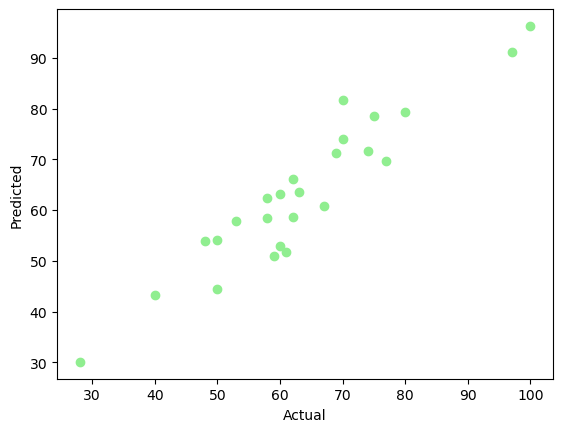

In [70]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred,color='lightgreen');
plt.xlabel('Actual');
plt.ylabel('Predicted');

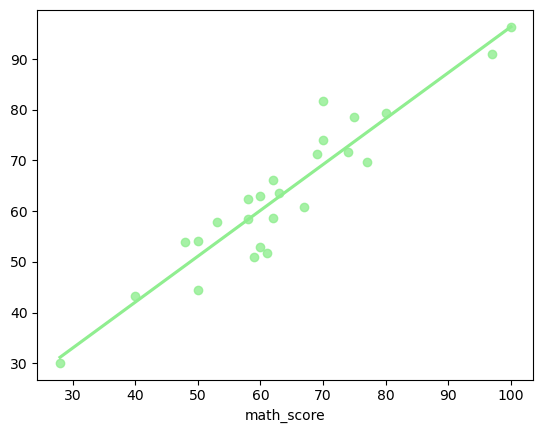

In [69]:
import seaborn as sns
sns.regplot(x=ytest,y=ypred,ci=None,color ='lightgreen');